In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 5.6 MB/s  eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.


In [3]:
!pip install tensorflow

     |████████████████████████████████| 1.3 MB 16.8 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [4]:
from keras.models import Sequential # api, se,
from keras.layers import Dense # add Layers
from keras.layers import Convolution2D # con
from keras.layers import MaxPooling2D#
from keras.layers import Flatten

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range= 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator (rescale = 1./255)

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GrZ7kVQCCjPQ4Q_sV3iogTFoJjDtoaPmhSVpikC8kr27',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'hwdr-donotdelete-pr-uj0omdqcy8vjzt'
object_key = 'HWDR.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_4.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [8]:
pwd

'/home/wsuser/work'

In [9]:
import os
filename = os.listdir('/home/wsuser/work/train')

In [10]:
x_train = train_datagen.flow_from_directory("/home/wsuser/work/train/",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory("/home/wsuser/work/train/",target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 48 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [11]:
x_train.class_indices

{'0': 0, '1': 1}

In [12]:
model = Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = "relu"))

In [14]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units = 128, activation = "relu"))

In [17]:
model.add(Dense(units = 2, activation = "softmax"))

In [18]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [19]:
model.fit(x_train,validation_data=x_test,epochs=5,batch_size=32)

Epoch 1/5
2/2 [==============================] - 1s 591ms/step - loss: 4.4678 - accuracy: 0.4167 - val_loss: 3.9180 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 1s 459ms/step - loss: 1.6290 - accuracy: 0.8333 - val_loss: 0.7483 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 0s 258ms/step - loss: 0.7239 - accuracy: 0.5000 - val_loss: 0.6456 - val_accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 0s 277ms/step - loss: 0.6990 - accuracy: 0.5833 - val_loss: 0.6271 - val_accuracy: 0.5000
Epoch 5/5
2/2 [==============================] - 0s 312ms/step - loss: 0.6309 - accuracy: 0.5000 - val_loss: 0.5071 - val_accuracy: 1.0000


In [21]:
model.save("digit.h5")

In [22]:
!tar -zcvf image-classification-model_new.tgz digit.h5

digit.h5


In [23]:
ls -1

digit.h5
image-classification-model_new.tgz
parkinson.h5
test/
train/


In [24]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 17.2 MB/s eta 0:00:01


In [25]:
#Replace the credentials that you got from watson Machine Learning Service
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey": "Vl4hs0XevdUF9GIkiEuR78FZlTxOHmYDPWSss8pXZkUE"
                  }
client = APIClient(wml_credentials)

In [26]:
client = APIClient(wml_credentials)

In [27]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [28]:
space_uid = guid_from_space_name(client, 'HDR')
print("Space UID = " + space_uid)

Space UID = a923815b-7232-4261-ab91-0ce94d4ba980


In [29]:
client.set.default_space(space_uid)

'SUCCESS'

In [30]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [31]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [32]:
 model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={ 
     client.repository.ModelMetaNames.NAME: "CNN",
     client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [33]:
model_id

'b24d500a-b9b2-43e8-b616-2c6d89d1cac7'

In [34]:
client.repository.download(model_id, 'my.model.tar.gz')

Successfully saved model content to file: 'my.model.tar.gz'


'/home/wsuser/work/my.model.tar.gz'

#Image Pre-processing
Importing the necessary libraries

In [35]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=20105444fd0ab022db1678a78f2c6aa07808da8e462f60988765fc7db7ccc8b8
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/4b/a5/2d/4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [36]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from skimage import feature
from imutils import paths
import os
import pickle

##Functions to load and quantify the images

In [37]:
def quantify_image(image):
    features = feature.hog(image, 
                           orientations=9, 
                           pixels_per_cell=(10,10), 
                           cells_per_block=(2,2), 
                           transform_sqrt=True, 
                           block_norm="L1")
    return features

In [38]:
def load_split(path):
    path_images = list(paths.list_images(path))
    data=[]
    labels=[]

    for path_image in path_images:
        label = path_image.split(os.path.sep)[-2]
        image = cv2.imread(path_image)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200,200))
        image = cv2.threshold(image,0,225,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        features = quantify_image(image)
        data.append(features)
        labels.append(label)

    return (np.array(data), np.array(labels))

#Using spiral & Wave images
##Defining the path for training data and testing data

In [39]:
path_training_data = r"/home/wsuser/work/train"
path_testing_data = r"/home/wsuser/work/test"

In [40]:
(x_train, y_train) = load_split(path_training_data)
(x_test, y_test) = load_split(path_testing_data)

In [41]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
y_train

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype='<U1')

In [43]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
y_test

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype='<U1')

##Label Encoding

In [45]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
print(x_train.shape, y_train.shape)

(48, 12996) (48,)


In [46]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [47]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#MODEL BUILDING
###Training the Model

In [48]:
print("Training model....")
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

Training model....


RandomForestClassifier()

In [49]:
preds = model.predict(x_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

##Model Evalution

In [50]:
cnf = confusion_matrix(y_test,preds)
cnf

array([[12,  0],
       [ 0, 12]])

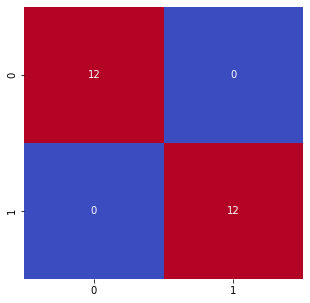

In [51]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [54]:
indexes = np.random.randint(0,30,25)
indexes

array([ 0, 27, 29, 17, 11, 11, 20, 16, 19, 11,  6,  1, 19,  2, 17, 19, 14,
       27,  3,  1, 10, 12, 24, 14, 21])

#Testing the Model

In [65]:
testingPaths = list(paths.list_images(path_testing_data))
idxs = np.arange(0, len(testingPaths))

images = []

for i in idxs:
    # loading the testing image, clone it, and resize it 
    image = cv2.imread(testingPaths[i]) 
    output = image. copy() 
    output = cv2. resize(output, (128, 128))
    
    # pre-processing the image 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1]
    
    # quantify the image and make predictions based on the extracted 
    # features using the last trained Random Forest 
    features = quantify_image(image) 
    preds = model.predict([features])

    label = label_encoder.inverse_transform(preds)[0]

   
    images.append(output)

##Predicting the model-Accuracy and Confusion Matrix

[[12  0]
 [ 0 12]]
1.0
Testing Sensitivity for Random Forest 1.0
Testing Specificity for Random Forest 1.0
Testing Precision for Random Forest 1.0
Testing accuracy for Random Forest 1.0


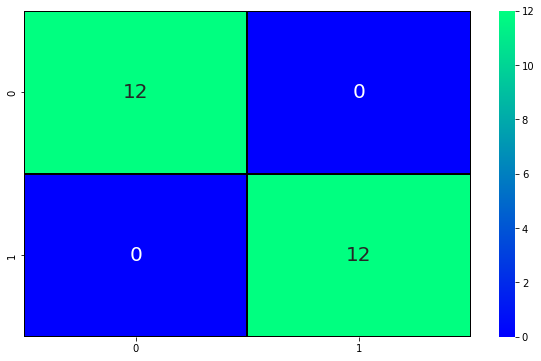

In [66]:
predictions = model.predict(x_test)    # predictions on the testing data 

cm = confusion_matrix(y_test, predictions)   # computing the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

print(cm) 
(TN, FP, FN, TP) = cm.flatten()

accuracy = (TP + TN) / float(cm.sum())     # computing the accuracy
print(accuracy)

print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, predictions))

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



#Save the model

In [68]:
pickle.dump(model,open('digit.pkl','wb')) 

In [69]:
!tar -zcvf image-classification-model_new.tgz digit.pkl

digit.pkl


In [70]:
ls

digit.h5   image-classification-model_new.tgz  parkinson.h5   test/
digit.pkl  my.model.tar.gz                     parkinson.pkl  train/


In [71]:
!pip install watson-machine-learning-client --upgrade

In [72]:
#Replace the credentials that you got from watson Machine Learning Service
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey": "Vl4hs0XevdUF9GIkiEuR78FZlTxOHmYDPWSss8pXZkUE"
                  }
client = APIClient(wml_credentials)

In [73]:
client = APIClient(wml_credentials)

In [74]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
a923815b-7232-4261-ab91-0ce94d4ba980  HDR   2022-11-22T10:16:22.307Z
------------------------------------  ----  ------------------------


In [77]:
space_id = guid_from_space_name(client,'HDR')
print('Space UID = ' + space_uid)

Space UID = a923815b-7232-4261-ab91-0ce94d4ba980


In [78]:
client.set.default_space(space_id)

'SUCCESS'

In [79]:
client.set.default_space(space_id)

'SUCCESS'

In [80]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [81]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9") 
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [82]:
 model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={ 
     client.repository.ModelMetaNames.NAME: "CNN",
     client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )
model_id = client.repository.get_model_uid(model_details)
 

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [84]:
DEPLOYMENT_NAME="HDR"
DEMO_MODEL=model

In [85]:
model_details
model_id=client.repository.get_model_id(model_details)
dep_props={
 client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
 client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [86]:
deployment=client.deployments.create(artifact_uid=model_id,meta_props=dep_props)



#######################################################################################

Synchronous deployment creation for uid: '02a7550d-5c53-47b2-8cbd-c590f9a2996e' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1ec368e4-8f31-4cd3-a17e-5d27927611e1'
------------------------------------------------------------------------------------------------


